In [6040]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import LabelEncoder

In [6041]:
#headers = ["buying","maint","doors","persons","lug_boot","safety"]

In [6042]:
df = pd.read_csv("..\\data\\secondary_data.csv", sep=';')

# Attribute Information:

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

In [6043]:
pd.options.display.max_columns = None

In [6044]:
df.head(100)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,p,12.16,x,h,e,f,e,NaN,w,17.46,17.51,s,y,w,u,w,t,g,NaN,d,u
96,p,16.04,f,h,o,f,e,NaN,w,17.39,17.19,s,y,w,u,w,t,p,NaN,d,u
97,p,16.31,f,h,e,f,e,NaN,w,17.15,17.05,s,y,w,u,w,t,g,NaN,d,u
98,p,15.35,f,g,o,f,e,NaN,w,17.89,18.21,s,y,w,u,w,t,g,NaN,d,u


In [6045]:
print("Dataset shape:", df.shape)

Dataset shape: (61069, 21)


In [6046]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6047]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [6048]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [6049]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [6050]:
df['veil-type'].value_counts()

u    3177
Name: veil-type, dtype: int64

#From above, we see that the dataset is balanced

In [6051]:
df['cap-shape'].unique()

array(['x', 'f', 'p', 'b', 'c', 's', 'o'], dtype=object)

In [6052]:
for col in df.columns:
    print("column name: {}".format(col) + " {}".format(df[col].unique()))

column name: class ['p' 'e']
column name: cap-diameter [15.26 16.6  14.07 ... 22.85 21.8  20.42]
column name: cap-shape ['x' 'f' 'p' 'b' 'c' 's' 'o']
column name: cap-surface ['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
column name: cap-color ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
column name: does-bruise-or-bleed ['f' 't']
column name: gill-attachment ['e' nan 'a' 'd' 's' 'x' 'p' 'f']
column name: gill-spacing [nan 'c' 'd' 'f']
column name: gill-color ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
column name: stem-height [16.95 17.99 17.8  ...  1.23  1.16  0.  ]
column name: stem-width [17.09 18.19 17.74 ... 32.59 30.99 30.51]
column name: stem-root ['s' nan 'b' 'r' 'c' 'f']
column name: stem-surface ['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
column name: stem-color ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
column name: veil-type ['u' nan]
column name: veil-color ['w' 'y' nan 'n' 'e' 'u' 'k']
column name: has-ring ['t' 'f']
column name: ring-type ['g' 'p' 'e

In [6053]:
#df = df.drop(columns=['veil-type','veil-color','spore-print-color','stem-root'])

In [6056]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [6057]:
print(df.groupby('class').mean())

       cap-diameter  stem-height  stem-width
class                                       
e          7.798696     7.039077   14.361084
p          5.879763     6.214554   10.375463


In [6058]:
df["class"].replace('e', 1, inplace=True)
df["class"].replace('p', 0, inplace=True)

In [6059]:
df.head(100)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,0,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,0,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,0,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,0,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,12.16,x,h,e,f,e,NaN,w,17.46,17.51,s,y,w,u,w,t,g,NaN,d,u
96,0,16.04,f,h,o,f,e,NaN,w,17.39,17.19,s,y,w,u,w,t,p,NaN,d,u
97,0,16.31,f,h,e,f,e,NaN,w,17.15,17.05,s,y,w,u,w,t,g,NaN,d,u
98,0,15.35,f,g,o,f,e,NaN,w,17.89,18.21,s,y,w,u,w,t,g,NaN,d,u


In [6060]:
cap_diameter = df["cap-diameter"]
stem_height = df["stem-height"]
stem_width = df["stem-width"]

class_ = df.iloc[:, 0]

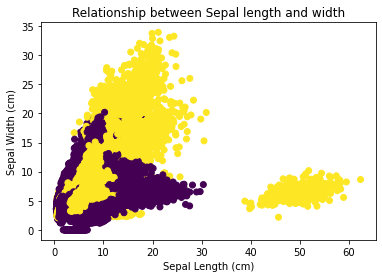

In [6061]:
plt.scatter(cap_diameter, stem_height, c=class_)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Relationship between Sepal length and width')
plt.show()

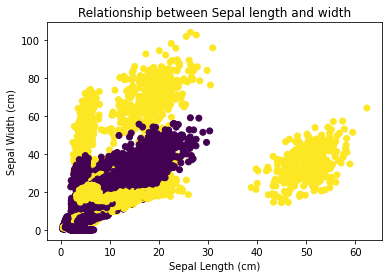

In [6062]:
plt.scatter(cap_diameter, stem_width, c=class_)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Relationship between Sepal length and width')
plt.show()

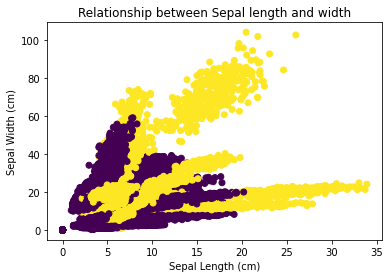

In [6063]:
plt.scatter(stem_height, stem_width, c=class_)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Relationship between Sepal length and width')
plt.show()

In [6064]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [6065]:
df = shuffle(df)

In [6070]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
24702,1,774,6,1,4,0,6,0,10,548,1652,5,8,11,1,6,0,1,7,0,2
18123,1,685,2,7,5,0,5,0,10,492,868,0,3,6,1,6,0,1,7,0,2
44035,1,1047,2,10,10,0,2,0,4,1780,1222,5,5,11,1,6,1,0,7,1,2
15642,0,690,6,7,2,1,5,1,10,481,1620,3,3,11,1,6,0,1,7,0,0
41101,0,549,6,5,5,0,1,0,11,399,572,5,3,6,1,6,1,8,7,0,2


In [6067]:
# split into features & target
X_data = df.drop(columns = ['class'])
y_data = df['class']

In [6068]:
features_train, features_test, labels_train, labels_test = train_test_split(X_data, y_data, test_size=0.1)


print("Number of data points in the training set is: ", len(labels_train))
print("Number of data points in the testing set is:  ", len(labels_test))

Number of data points in the training set is:  54962
Number of data points in the testing set is:   6107


In [6018]:
#dt = DecisionTreeClassifier(max_depth = 10)
dt = DecisionTreeClassifier()
dt.fit(features_train, labels_train)

DecisionTreeClassifier()

In [6019]:
y_pred_dt = dt.predict(features_test)
print("Decision Tree Classifier report: \n\n", classification_report(labels_test, y_pred_dt))
baseline = "Test Accuracy: {}%".format(round(dt.score(features_test, labels_test)*100, 2))
print(baseline)

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3373
           1       0.99      1.00      1.00      2734

    accuracy                           1.00      6107
   macro avg       1.00      1.00      1.00      6107
weighted avg       1.00      1.00      1.00      6107

Test Accuracy: 99.61%


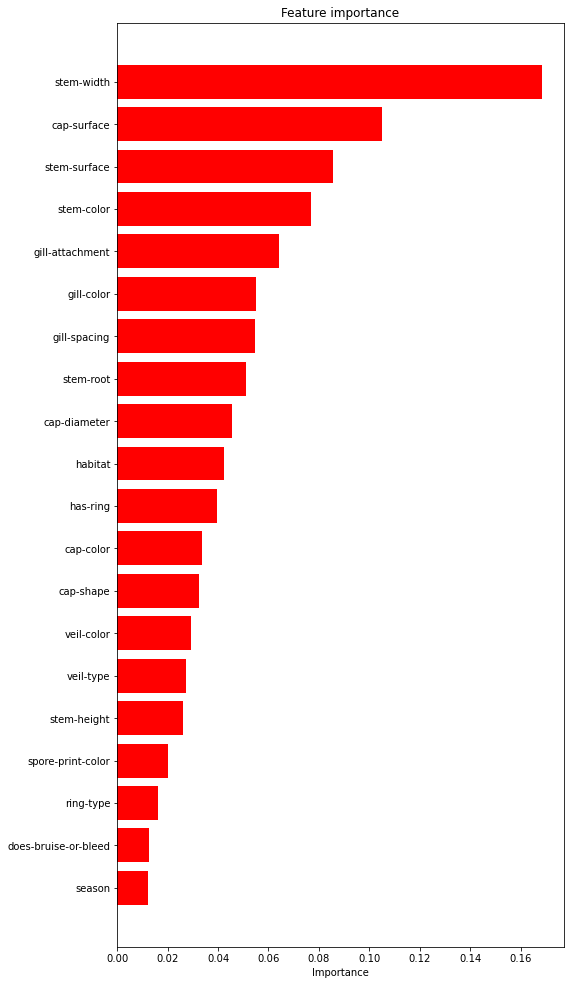

In [6020]:
features_list = X_data.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,17))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

In [6021]:
cap_shape = pd.get_dummies(df['cap-shape'], prefix='Cap_shape')
cap_surface = pd.get_dummies(df['cap-surface'], prefix='Cap_surface')
stem_color = pd.get_dummies(df['stem-color'], prefix='Stem_colour')
gill_attachment = pd.get_dummies(df['gill-attachment'], prefix='Gill_attachment')
gill_spacing = pd.get_dummies(df['gill-spacing'], prefix='Gill_spacing')
stem_color = pd.get_dummies(df['stem-color'], prefix='Stem_color')
has_ring = pd.get_dummies(df['has-ring'], prefix='Has_ring')
ring_type = pd.get_dummies(df['ring-type'], prefix='Ring_type')
habitat = pd.get_dummies(df['habitat'], prefix='Habitat')
season = pd.get_dummies(df['season'], prefix='Seasons')

In [6022]:
#df_dummies = pd.concat([df[["stem-height","stem-width","cap-diameter","class"]]], axis=1, sort=False)
df_dummies = pd.concat([cap_surface, cap_surface, stem_color, gill_attachment, gill_spacing, stem_color, has_ring, ring_type, habitat, season, df[["stem-height","stem-width","cap-diameter","class"]]], axis=1, sort=False)

In [6023]:
#plt.figure(figsize=(140,120))
#sns.heatmap(df_dummies.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
#plt.yticks(rotation=0);

In [6024]:
df_dummies.head(5)

,Cap_surface_0,Cap_surface_1,Cap_surface_2,Cap_surface_3,Cap_surface_4,Cap_surface_5,Cap_surface_6,Cap_surface_7,Cap_surface_8,Cap_surface_9,Cap_surface_10,Cap_surface_11,Cap_surface_0,Cap_surface_1,Cap_surface_2,Cap_surface_3,Cap_surface_4,Cap_surface_5,Cap_surface_6,Cap_surface_7,Cap_surface_8,Cap_surface_9,Cap_surface_10,Cap_surface_11,Stem_color_0,Stem_color_1,Stem_color_2,Stem_color_3,Stem_color_4,Stem_color_5,Stem_color_6,Stem_color_7,Stem_color_8,Stem_color_9,Stem_color_10,Stem_color_11,Stem_color_12,Gill_attachment_0,Gill_attachment_1,Gill_attachment_2,Gill_attachment_3,Gill_attachment_4,Gill_attachment_5,Gill_attachment_6,Gill_attachment_7,Gill_spacing_0,Gill_spacing_1,Gill_spacing_2,Gill_spacing_3,Stem_color_0,Stem_color_1,Stem_color_2,Stem_color_3,Stem_color_4,Stem_color_5,Stem_color_6,Stem_color_7,Stem_color_8,Stem_color_9,Stem_color_10,Stem_color_11,Stem_color_12,Has_ring_0,Has_ring_1,Ring_type_0,Ring_type_1,Ring_type_2,Ring_type_3,Ring_type_4,Ring_type_5,Ring_type_6,Ring_type_7,Ring_type_8,Habitat_0,Habitat_1,Habitat_2,Habitat_3,Habitat_4,Habitat_5,Habitat_6,Habitat_7,Seasons_0,Seasons_1,Seasons_2,Seasons_3,stem-height,stem-width,cap-diameter,class
35930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,273,483,396,0
17854,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,679,1378,701,1
60524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,422,1928,458,1
42848,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1249,1803,1800,1
33532,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,702,1747,1203,0


In [6025]:
df_dummies = shuffle(df_dummies)

In [6026]:
# split into features & target
X_data = df_dummies.drop(columns = ['class'])
y_data = df_dummies['class']

In [6027]:
features_train, features_test, labels_train, labels_test = train_test_split(X_data, y_data, test_size=0.1)


print("Number of data points in the training set is: ", len(labels_train))
print("Number of data points in the testing set is:  ", len(labels_test))

Number of data points in the training set is:  54962
Number of data points in the testing set is:   6107


In [6028]:
dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(max_depth = 100, min_samples_leaf = 10, max_leaf_nodes = 10)
dt.fit(features_train, labels_train)

DecisionTreeClassifier()

In [6029]:
y_pred_dt = dt.predict(features_test)
print("Decision Tree Classifier report: \n\n", classification_report(labels_test, y_pred_dt))

baseline2 = "Test Accuracy: {}%".format(round(dt.score(features_test, labels_test)*100, 2))
print(baseline2)

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00      2725

    accuracy                           1.00      6107
   macro avg       1.00      1.00      1.00      6107
weighted avg       1.00      1.00      1.00      6107

Test Accuracy: 99.61%


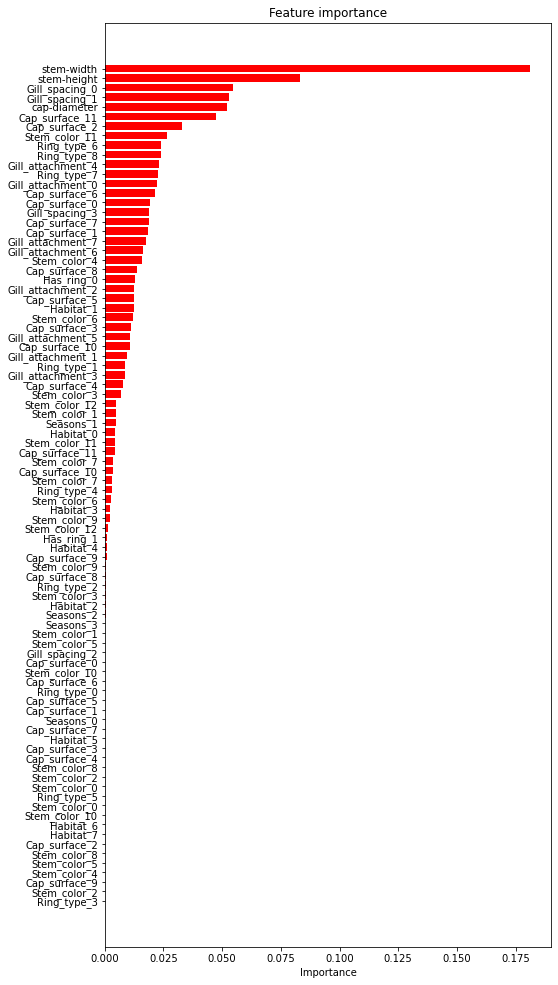

In [6030]:
features_list = X_data.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,17))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

In [6031]:
#df_dummies = df_dummies.drop(columns=['Stem_color_r','Stem_color_u','Habitat_w','Habitat_u','Stem_color_y','Habitat_u','Habitat_p'])


In [6032]:
print(features_list[sorted_idx].tolist()[::-1])

['stem-width', 'stem-height', 'Gill_spacing_0', 'Gill_spacing_1', 'cap-diameter', 'Cap_surface_11', 'Cap_surface_2', 'Stem_color_11', 'Ring_type_6', 'Ring_type_8', 'Gill_attachment_4', 'Ring_type_7', 'Gill_attachment_0', 'Cap_surface_6', 'Cap_surface_0', 'Gill_spacing_3', 'Cap_surface_7', 'Cap_surface_1', 'Gill_attachment_7', 'Gill_attachment_6', 'Stem_color_4', 'Cap_surface_8', 'Has_ring_0', 'Gill_attachment_2', 'Cap_surface_5', 'Habitat_1', 'Stem_color_6', 'Cap_surface_3', 'Gill_attachment_5', 'Cap_surface_10', 'Gill_attachment_1', 'Ring_type_1', 'Gill_attachment_3', 'Cap_surface_4', 'Stem_color_3', 'Stem_color_12', 'Stem_color_1', 'Seasons_1', 'Habitat_0', 'Stem_color_11', 'Cap_surface_11', 'Stem_color_7', 'Cap_surface_10', 'Stem_color_7', 'Ring_type_4', 'Stem_color_6', 'Habitat_3', 'Stem_color_9', 'Stem_color_12', 'Has_ring_1', 'Habitat_4', 'Cap_surface_9', 'Stem_color_9', 'Cap_surface_8', 'Ring_type_2', 'Stem_color_3', 'Habitat_2', 'Seasons_2', 'Seasons_3', 'Stem_color_1', 'Stem_c

In [6033]:
features = ['class']
list_ = []
ids = []
for item in features_list[sorted_idx].tolist()[::-1][:5]:
    
    features.append(item)
    #print(features)
    #print(len(features))
    df_dummies_loop = df_dummies[features]
    
    # split into features & target
    X_data = df_dummies_loop.drop(columns = ['class'])
    y_data = df_dummies_loop['class']
    
    features_train, features_test, labels_train, labels_test = train_test_split(X_data, y_data, test_size=0.1)


    #print("Number of data points in the training set is: ", len(labels_train))
    #print("Number of data points in the testing set is:  ", len(labels_test))
    
    dt = DecisionTreeClassifier()
    #dt = DecisionTreeClassifier(max_depth = 100, min_samples_leaf = 10, max_leaf_nodes = 10)
    dt.fit(features_train, labels_train)
    
    y_pred_dt = dt.predict(features_test)
    #print("Decision Tree Classifier report: \n\n", classification_report(labels_test, y_pred_dt))
    #print(baseline)
    #print(baseline2)
    #print("Test Accuracy: {}%".format(round(dt.score(features_test, labels_test)*100, 2)))
    #print('\n')
    #print(float(round(dt.score(features_test, labels_test)*100, 2)))
    #print(float(baseline.split()[-1][:-1]))    
    list_.append(float(round(dt.score(features_test, labels_test)*100, 2)))
    ids.append(len(features))

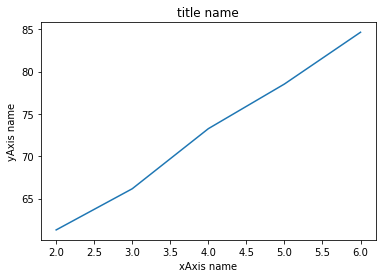

In [6034]:
plt.plot(ids,list_)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [6035]:
list_ = []
ids = []
for int_ in [20]:
    
    df_dummies_loop = df_dummies[features_list[sorted_idx].tolist()[::-1][:50]+["class"]]


    # split into features & target
    X_data = df_dummies_loop.drop(columns = ['class'])
    y_data = df_dummies_loop['class']

    features_train, features_test, labels_train, labels_test = train_test_split(X_data, y_data, test_size=0.1)


    #print("Number of data points in the training set is: ", len(labels_train))
    #print("Number of data points in the testing set is:  ", len(labels_test))

    #dt = DecisionTreeClassifier()
    dt = DecisionTreeClassifier(max_depth = int_)
    dt.fit(features_train, labels_train)

    y_pred_dt = dt.predict(features_test)
    #print("Decision Tree Classifier report: \n\n", classification_report(labels_test, y_pred_dt))
    #print(baseline)
    #print(baseline2)
    #print("Test Accuracy: {}%".format(round(dt.score(features_test, labels_test)*100, 2)))
    #print('\n')
    #print(int)
    #if float(round(dt.score(features_test, labels_test)*100, 2)) > float(baseline.split()[-1][:-1]):
        #print("yes")
    list_.append(float(round(dt.score(features_test, labels_test)*100, 2)))
    ids.append(int_)

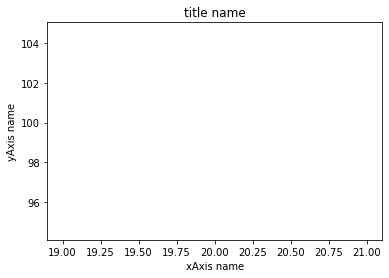

In [6036]:
plt.plot(ids,list_)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [6037]:
list_ = []
ids = []
for int_ in [380]:
    
    df_dummies_loop = df_dummies[features_list[sorted_idx].tolist()[::-1][:50]+["class"]]


    # split into features & target
    X_data = df_dummies_loop.drop(columns = ['class'])
    y_data = df_dummies_loop['class']

    features_train, features_test, labels_train, labels_test = train_test_split(X_data, y_data, test_size=0.1)


    #print("Number of data points in the training set is: ", len(labels_train))
    #print("Number of data points in the testing set is:  ", len(labels_test))

    #dt = DecisionTreeClassifier()
    dt = DecisionTreeClassifier(max_depth = 20,max_leaf_nodes = int_)
    dt.fit(features_train, labels_train)

    y_pred_dt = dt.predict(features_test)
    #print("Decision Tree Classifier report: \n\n", classification_report(labels_test, y_pred_dt))
    #print(baseline)
    #print(baseline2)
    print("Test Accuracy: {}%".format(round(dt.score(features_test, labels_test)*100, 2)))
    #print('\n')
    #print(int)
    #if float(round(dt.score(features_test, labels_test)*100, 2)) > float(baseline.split()[-1][:-1]):
        #print("yes")
    list_.append(float(round(dt.score(features_test, labels_test)*100, 2)))
    ids.append(int_)

Test Accuracy: 99.54%


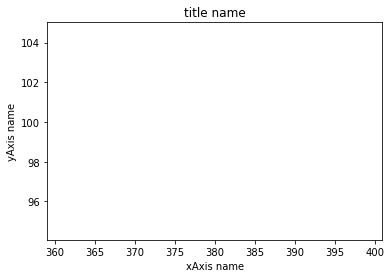

In [6038]:
plt.plot(ids,list_)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [6039]:
df_dummies_loop = df_dummies[features_list[sorted_idx].tolist()[::-1][:50]+["class"]]

# split into features & target
X_data = df_dummies_loop.drop(columns = ['class'])
y_data = df_dummies_loop['class']

features_train, features_test, labels_train, labels_test = train_test_split(X_data, y_data, test_size=0.1)


#print("Number of data points in the training set is: ", len(labels_train))
#print("Number of data points in the testing set is:  ", len(labels_test))

#dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(max_depth = 20,max_leaf_nodes = 380)
dt.fit(features_train, labels_train)

y_pred_dt = dt.predict(features_test)
#print("Decision Tree Classifier report: \n\n", classification_report(labels_test, y_pred_dt))
print(baseline)
print(baseline2)

print("Test Accuracy: {}%".format(round(dt.score(features_test, labels_test)*100, 2)))
#print('\n')
#print(int)
#if float(round(dt.score(features_test, labels_test)*100, 2)) > float(baseline.split()[-1][:-1]):
    #print("yes")
list_.append(float(round(dt.score(features_test, labels_test)*100, 2)))
ids.append(int_)

Test Accuracy: 99.61%
Test Accuracy: 99.61%
Test Accuracy: 99.49%
